# Modélisation des probas

In [1]:
import os
import pandas as pd
os.getcwd()

path = "c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage\\Bases sinistres"

datap = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_5016\4172452751.py:7: DtypeWarning: Columns (24,83) have mixed types. Specify dtype option on import or set low_memory=False.
  datap = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")


In [2]:
import pandas as pd
import numpy as np

# --------------------------------------------------------------------------
# 0. Noms des colonnes montants
# --------------------------------------------------------------------------
mo_col    = "MT_MO_REPARABLE"
ip_col    = "MT_IP_REPARABLE"
piece_col = "MT_PIECES_REPARABLE"

# --------------------------------------------------------------------------
# 1. Variable texte brute : combinaison exacte des postes > 0
# --------------------------------------------------------------------------
def structure_postes(row):
    postes = []
    if row[mo_col]    > 0: postes.append("MO")
    if row[ip_col]    > 0: postes.append("IP")
    if row[piece_col] > 0: postes.append("PIECES")
    return "+".join(postes) if postes else "AUCUN"

datap["structure_sinistre"] = datap.apply(structure_postes, axis=1)

# --------------------------------------------------------------------------
# 2. Fusion souhaitée → nouvelle variable `structure_grp`
#    • IP  regroupe  {IP, MO+IP}
#    • PIECES regroupe {PIECES, MO+PIECES}
# --------------------------------------------------------------------------
map_fusion = {
    "MO"              : "MO",
    "IP"              : "MO+IP",
    "MO+IP"           : "MO+IP",          # fusion ici
    "PIECES"          : "MO+PIECES",
    "MO+PIECES"       : "MO+PIECES",      # fusion ici
    "IP+PIECES"       : "IP+PIECES",
    "MO+IP+PIECES"    : "MO+IP+PIECES",
    "AUCUN"           : "AUCUN"
}

datap["structure_grp"] = datap["structure_sinistre"].map(map_fusion)

# --------------------------------------------------------------------------
# 3. Identifiant numérique  (tu peux changer les numéros si besoin)
# --------------------------------------------------------------------------
map_id = {
    "MO"              : 1,
    "MO+IP"              : 2,
    "MO+PIECES"          : 3,
    "IP+PIECES"       : 4,
    "MO+IP+PIECES"    : 5,
    "AUCUN"           : 0          # facultatif
}

datap["structure_id"] = datap["structure_grp"].map(map_id)

# --------------------------------------------------------------------------
# 4. Table de fréquence : pour contrôle
# --------------------------------------------------------------------------
freq = (
    datap.groupby(["structure_id", "structure_grp"])
         .size()
         .reset_index(name="n_sinistres")
         .sort_values("structure_id")
)

print(freq.to_string(index=False))


 structure_id structure_grp  n_sinistres
            1            MO           15
            2         MO+IP        81351
            3     MO+PIECES          356
            4     IP+PIECES           26
            5  MO+IP+PIECES       920097


In [3]:
pieces_seul = datap[
    (datap['MT_PIECES_REPARABLE'] > 0) &
    (datap['MT_MO_REPARABLE'] == 0) &
    (datap['MT_IP_REPARABLE'] == 0)
]
print("Nb de sinistres 'PIECES seule' :", len(pieces_seul))


Nb de sinistres 'PIECES seule' : 0


In [4]:
print(list(datap.columns))

['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE', 'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO', 'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS', 'MT_AVANCE_RECOURS',

In [5]:
import pandas as pd

# Création des colonnes indicatrices (uint8 → 0/1)
dummies = pd.get_dummies(datap['exercice'], prefix='year').astype(int)

# (Optionnel) on retire l’année de base 2019 pour éviter la colinéarité
dummies = dummies.drop(columns=['year_2019'])

# Fusion avec ton DataFrame
datap = pd.concat([datap, dummies], axis=1)


In [7]:
import pandas as pd

# 0) ton DataFrame initial ----------------------------------------------------
# df = pd.read_csv("ton_fichier.csv")  # ou déjà présent en mémoire

# 1) liste explicite de TOUTES tes variables (copiée depuis ta question) -----
all_vars = [
    'cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp',
    'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais',
    'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest',
    'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG',
    'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment',
    'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid',
    'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite',
    'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup',
    'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt',
    'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice',
    'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE',
    'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO',
    'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS',
    'MT_AVANCE_RECOURS', 'MT_AVANCE_RECOURS_RECOURUS', 'MT_PAIEMENTS',
    'MT_CHARGE_BRUTE_ECO', 'MT_CHARGE_NETTE_ECO', 'ZN_NO_RAPPORT_EXPTIS',
    'MT_VAL_REMPL_VEH_TTC', 'MT_TOTAL_REPARABLE', 'NB_REP', 'MT_MO_REPARABLE',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'MT_IP_REPARABLE',
    'NBHH_IP_REPARABLE', 'MT_PIECES_REPARABLE', 'NB_PIECES_REEMPLOI',
    'MT_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP',
    'RE_AVEC_PIECE_REMPL_MP', 'MT_REMISE', 'MT_FORFAIT', 'MT_FORFAIT_ERD',
    'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'DPT_REP', '_RESEAU_',
    'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'veh_info_manquante', 'date_ord',
    'date_sortie_veh_imputee', 'annee_sortie_veh', 'date_nais_f',
    'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g',
    'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g',
    'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g',
    'marq_g', 'garag_g', 'Region', 'Zone', 'structure_sinistre', 'structure_id',
    'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024'
]

# 2) distinguer variables montants vs non montants ---------------------------
montants     = [v for v in all_vars if v.startswith('MT_')]
non_montants = [v for v in all_vars if v not in montants]

print(f"{len(montants)} variables de montant supprimées.")
print(f"{len(non_montants)} variables conservées.")

# 3) créer la base sans montants ---------------------------------------------
datap_sm = datap[non_montants].copy()

# 4) enregistrer si besoin ----------------------------------------------------
#datap_sm.to_csv("baseproba_sans_montants.csv", index=False, encoding="utf-8")


24 variables de montant supprimées.
116 variables conservées.


In [8]:
datap_sm.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,garag_g,Region,Zone,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,04/01/2019,O,N,plus_50pc,29/06/1987,09/01/2015,PRO,N,...,Petit garage,Nouvelle-Aquitaine,Ouest,MO+IP+PIECES,5,0,0,0,0,0
1,191840048C A 001,01/01/2019,02/01/2019,N,N,plus_50pc,10/11/2018,2023-12-31 00:00:00,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,5,0,0,0,0,0
2,191840501C A 010,03/01/2019,04/01/2019,O,N,plus_50pc,13/07/2016,03/04/2018,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,5,0,0,0,0,0
3,191840759C A 001,06/01/2019,07/01/2019,O,N,plus_50pc,25/10/2015,2023-12-31 00:00:00,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,5,0,0,0,0,0
4,191840075AV A 003,01/01/2019,02/01/2019,O,N,plus_50pc,10/06/2015,11/03/2016,PRO,N,...,Garage moyen,NaN,I,MO+IP+PIECES,5,0,0,0,0,0


In [9]:
print(list(datap_sm.columns))

['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'NB_REP', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE', 'NB_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP', 'LIB_CHOC', 'LIB_INTENS', 'GA

In [10]:
# ---------------------------------------------
# 1. Liste des variables à exclure
# ---------------------------------------------
exclure = [
    'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous',
    'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'Zone',
    'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest',
    'date_sortie_veh', 'usage2', 'franch', 'rachat_francBG',
    'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros',
    'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pfisc', 'vites',
    'pvid', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur',
    'systeme', 'exercice', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'NB_REP',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE',
    'NB_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP',
    'RE_AVEC_PIECE_REMPL_MP', 'veh_info_manquante', 'date_ord',
    'date_sortie_veh_imputee', 'DPT_REP'
]

# ---------------------------------------------
# 2. Variable d’origine : par ex. non_montants
#    (remplace par le nom réel de ta liste)
# ---------------------------------------------
# non_montants = [...]  # ta liste existante

# ---------------------------------------------
# 3. Création de la nouvelle liste filtrée
# ---------------------------------------------
vars_filtrees = [col for col in non_montants if col not in exclure]

print(f"{len(non_montants)} variables initiales → {len(vars_filtrees)} après exclusion.")

datap_s = datap_sm[vars_filtrees].copy()


116 variables initiales → 62 après exclusion.


In [11]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'age', 'aac', 'age_veh', 'pkw', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', '_RESEAU_', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [12]:
# 4) enregistrer si besoin ----------------------------------------------------
datap_s.to_csv(path + "basefinproba_sans_montants.csv", index=False, encoding="utf-8")



In [13]:
datap_s.head()

,cle_sin,date_evt,age,aac,age_veh,pkw,poidspuiss,sport,frein,cdval,...,marq_g,garag_g,Region,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,84.0,N,3.0,66.0,12.0,nn_spt,ABS,V06,...,Généralistes,Petit garage,Nouvelle-Aquitaine,MO+IP+PIECES,5,0,0,0,0,0
1,191840048C A 001,01/01/2019,18.0,O,6.0,51.5,15.0,nn_spt,ABS,V06,...,Autres,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
2,191840501C A 010,03/01/2019,67.0,N,6.0,180.0,7.0,spt,ABS,V24,...,Premium,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
3,191840759C A 001,06/01/2019,40.0,N,12.0,78.0,13.0,nn_spt,ABS,V09,...,Généralistes,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
4,191840075AV A 003,01/01/2019,47.0,N,3.0,84.0,12.0,nn_spt,ABS,V11,...,Généralistes,Garage moyen,NaN,MO+IP+PIECES,5,0,0,0,0,0


In [14]:
print(len(list(datap_s.columns)))

62


## Petite sélection de variables

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Remplace 'sparse' par 'sparse_output'
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [16]:
import pandas as pd
import numpy as np

to_exclude = set()

# a) identifiants, cible
to_exclude.update(['cle_sin', 'structure_id', 'structure_sinistre'])


# c) éventuellement d’autres colonnes (dates si tu ne les transformes pas)
to_exclude.update(['date_evt', 'date_premsous'])

# ------------------------------------------------------------------
# 1) Détection auto : quali vs quanti
# ------------------------------------------------------------------
# numériques : int, float, bool
quant_vars = [
    c for c in datap_s.columns
    if (datap_s[c].dtype.kind in 'iufcb')    # integer, unsigned, float, complex, bool
    and c not in to_exclude
]

# qualitatives : object ou category
qual_vars = [
    c for c in datap_s.columns
    if (datap_s[c].dtype == 'object' or str(datap_s[c].dtype) == 'category')
    and c not in to_exclude
]

print(f"{len(quant_vars)} variables numériques retenues")
print(f"{len(qual_vars)} variables qualitatives retenues")


19 variables numériques retenues
39 variables qualitatives retenues


In [17]:
# -----------------------------------------------------------------
# 1. Sous-ensemble : uniquement les variables quantitatives
# -----------------------------------------------------------------
X = datap_s[quant_vars].copy()

In [18]:
# Comptage des NaN pour chaque variable quantitative
nan_counts = datap_s[quant_vars].isna().sum()

# Affiche uniquement celles qui ont au moins un NaN
print("Variables quantitatives avec valeurs manquantes :")
print(nan_counts[nan_counts > 0])


Variables quantitatives avec valeurs manquantes :
Series([], dtype: int64)


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({
    "variable": X.columns,
    "VIF"     : [variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])]
})
print(vif.sort_values("VIF", ascending=False).head(15))


            variable          VIF
13  annee_sortie_veh  1228.068416
9            boncond  1104.917826
2                pkw    87.964159
3         poidspuiss    49.000396
8                crm    39.228716
4                val    36.179551
0                age    18.552097
7             co2min    17.605847
5             couple    12.064447
6             airbag    10.377932
1            age_veh     4.139207
10             nab50     2.754166
12  NB_PIECE_REPAREE     2.327961
18         year_2024     2.289180
17         year_2023     2.135326


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calcul_vif(X):
    """Calcule les VIFs pour chaque variable de X."""
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

def supprimer_vif(X, seuil=10):
    """Supprime récursivement les variables avec un VIF supérieur au seuil."""
    X_clean = X.copy()
    iteration = 1
    while True:
        vif = calcul_vif(X_clean)
        max_vif = vif["VIF"].max()
        if max_vif > seuil:
            var_a_suppr = vif.sort_values("VIF", ascending=False).iloc[0]["variable"]
            print(f"[Itération {iteration}] Suppression de '{var_a_suppr}' avec VIF = {max_vif:.2f}")
            X_clean = X_clean.drop(columns=[var_a_suppr])
            iteration += 1
        else:
            break
    print(f"\n✅ Variables finales conservées ({X_clean.shape[1]}):\n{list(X_clean.columns)}")
    return X_clean


In [21]:
X_vif_clean = supprimer_vif(X, seuil=10)


[Itération 1] Suppression de 'annee_sortie_veh' avec VIF = 1228.07
[Itération 2] Suppression de 'boncond' avec VIF = 190.56
[Itération 3] Suppression de 'pkw' avec VIF = 59.43
[Itération 4] Suppression de 'crm' avec VIF = 18.01
[Itération 5] Suppression de 'val' avec VIF = 13.75
[Itération 6] Suppression de 'age' avec VIF = 11.99
[Itération 7] Suppression de 'co2min' avec VIF = 10.45

✅ Variables finales conservées (12):
['age_veh', 'poidspuiss', 'couple', 'airbag', 'nab50', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


VAR QUAL

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    """Cramér’s V pour deux variables catégorielles pandas (sans correction)."""
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion, correction=False)[0]
    n    = confusion.sum().sum()
    k,r  = confusion.shape               # colonnes, lignes
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

def matrice_cramer(df, cat_cols):
    """Renvoie une matrice DataFrame de Cramér’s V pour toutes les paires."""
    V = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for i, col1 in enumerate(cat_cols):
        for col2 in cat_cols[i:]:
            V.loc[col1, col2] = V.loc[col2, col1] = cramer_v(df[col1], df[col2])
    return V

# --- utilisation ------------------------------------------------------------
cat_cols = qual_vars                            # tes variables qualitatives
V = matrice_cramer(datap_s, cat_cols)

# lister les couples très corrélés (|V| > 0.7)
thr = 0.7
corr_pairs = (
    V.where(np.triu(np.ones(V.shape), k=1).astype(bool))
      .stack()
      .reset_index()
      .rename(columns={0: 'CramerV'})
      .query('CramerV > @thr')
      .sort_values('CramerV', ascending=False)
)
print(corr_pairs.head())


MemoryError: Unable to allocate 6.32 GiB for an array with shape (29115, 29115) and data type float64

In [20]:
vars_to_remove = [
    'cdval',
    'crash',
    'alim',
    '_RESEAU_',  # ou GARAGE_AGREE_O_N
    'frein'
]


In [21]:
datap_s = datap_s.drop(columns=vars_to_remove)

# ARRET ICI

In [22]:
# ------------------------------------------------------------------
# 1. Liste des variables à exclure
# ------------------------------------------------------------------
exclude_cols = {'date_evt', 'cle_sin'}   # ajoute-en d'autres si besoin

# ------------------------------------------------------------------
# 2. Création de vars_final
# ------------------------------------------------------------------
vars_final = [col for col in datap_s.columns if col not in exclude_cols]

print(f"{len(datap_s.columns)} colonnes au départ → {len(vars_final)} conservées")
print(vars_final[:15], "...")   # aperçu des 15 premières


57 colonnes au départ → 55 conservées
['age', 'aac', 'age_veh', 'pkw', 'poidspuiss', 'sport', 'trans', 'suspe', 'boite', 'val', 'couple', 'airbag', 'co2min', 'elt_secu', 'vu'] ...


In [23]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'age', 'aac', 'age_veh', 'pkw', 'poidspuiss', 'sport', 'trans', 'suspe', 'boite', 'val', 'couple', 'airbag', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix
# ------------------------------------------------------------
# a) Colonnes finales
#    - vars_final_num  : toutes les quantitatives retenues
#    - vars_final_cat  : toutes les qualitatives retenues
# ------------------------------------------------------------
vars_final_num = [v for v in vars_final if datap_s[v].dtype.kind in "iufcb"]
vars_final_cat = [v for v in vars_final if v not in vars_final_num]

X = datap_s[vars_final_num + vars_final_cat]        # matrice explicative
y = datap_s["structure_id"]                        # variable cible (1 à 7)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

In [46]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------  11.0/11.1 MB 62.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 53.6 MB/s eta 0:00:00

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.7.0

   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
    Uninstalling scikit-learn-1.7.0:
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
      Successfully uninstalled scikit-learn-1.7.0
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   -----------------------

  You can safely remove it manually.


In [67]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Générer un dataset déséquilibré
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('clf', LogisticRegression(solver='lbfgs', max_iter=1000))
])

pipeline.fit(X_train, y_train)
print("Test score:", pipeline.score(X_test, y_test))


ImportError: cannot import name 'threadpool_info' from 'sklearn.utils.fixes' (c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\utils\fixes.py)

In [69]:
import sklearn
import imblearn
import threadpoolctl
print(sklearn.__version__)
print(imblearn.__version__)
print(threadpoolctl.__version__)


ImportError: cannot import name 'threadpool_info' from 'sklearn.utils.fixes' (c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\utils\fixes.py)

In [74]:
from sklearn.utils import fixes
print(fixes.threadpool_info())




AttributeError: module 'sklearn.utils.fixes' has no attribute 'threadpool_info'

In [68]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline  # pipeline compatible SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# ------------------------------------------------------------
# b) Pipeline : One-hot + régression multinomiale
# ------------------------------------------------------------
preproc = ColumnTransformer(
    [("cat", OneHotEncoder(drop="first", sparse_output=True, handle_unknown="ignore"
                            ),
      vars_final_cat)],
    remainder="passthrough"
)

# ------------------------------------------------------------------
smote_enn = SMOTEENN(
    sampling_strategy="auto",   # auto = équilibre vers la classe majoritaire après ENN
    random_state=42,            # reproductible
    n_jobs=-1
)
# ------------------------------------------------------------------

model = ImbPipeline([
    ("prep", preproc),
    ("smote",  smote_enn),
    ("clf",  LogisticRegression(
                multi_class="multinomial",
                class_weight="balanced",
                solver="lbfgs",
                max_iter=400,
                n_jobs=-1))
])


# ------------------------------------------------------------
# c) Entraînement
# ------------------------------------------------------------
model.fit(X_train,y_train)
print("Log-loss in-sample :", log_loss(y_test, model.predict_proba(X_test)))


ImportError: cannot import name 'threadpool_info' from 'sklearn.utils.fixes' (c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\utils\fixes.py)

In [38]:
y_pred = model.predict(X_test)


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [39]:
# En tableau côte à côte
comparaison = pd.DataFrame({
    "réel": y_test.values,
    "prévu": y_pred
})

print(comparaison.head(20))  # Affiche les 20 premières lignes

    réel  prévu
0      5      5
1      5      5
2      5      5
3      2      5
4      5      1
5      2      1
6      5      3
7      5      4
8      2      5
9      5      5
10     5      5
11     5      4
12     2      2
13     5      5
14     5      1
15     5      2
16     5      5
17     5      1
18     5      5
19     5      5


In [40]:
# Probabilité prédite pour chaque classe (multinomial)
probas = model.predict_proba(X_test)

# Par exemple, pour les 5 premières observations
proba_df = pd.DataFrame(probas, columns=model.named_steps["clf"].classes_)
print(proba_df.head())


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


          1         2         3         4         5
0  0.189413  0.210490  0.197884  0.188746  0.213468
1  0.209747  0.206348  0.207360  0.164910  0.211634
2  0.173038  0.240725  0.205586  0.131159  0.249492
3  0.207617  0.232664  0.210403  0.116494  0.232822
4  0.226656  0.223051  0.205944  0.129953  0.214396


METRIQUES

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


F1_macro             0.1429
Balanced_accuracy    0.2644
Precision_macro      0.2205
Recall_macro         0.2644
Log_loss             1.5655
Cohen_kappa          0.0314
dtype: float64


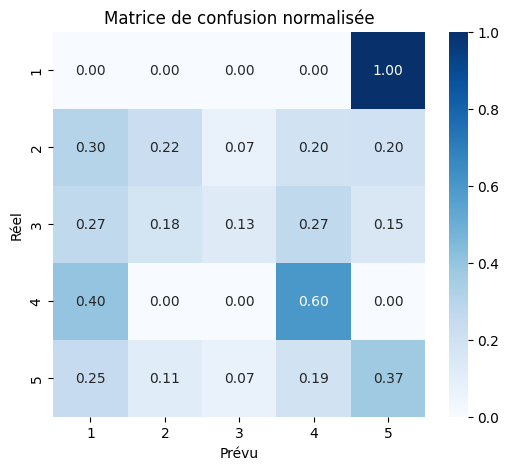

In [41]:
from sklearn.metrics import (
    f1_score, balanced_accuracy_score,
    precision_score, recall_score,
    log_loss, cohen_kappa_score,
    confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# y_test  : vraies classes
# y_pred  : classes prédites           → clf.predict(X_test)
# y_proba : probas par classe (n×K)    → clf.predict_proba(X_test)
# -------------------------------------------------------------
y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# ---- 1. Métriques numériques --------------------------------
metrics = {
    "F1_macro"          : f1_score(y_test, y_pred, average="macro"),
    "Balanced_accuracy" : balanced_accuracy_score(y_test, y_pred),
    "Precision_macro"   : precision_score(y_test, y_pred, average="macro", zero_division=0),
    "Recall_macro"      : recall_score(y_test, y_pred, average="macro", zero_division=0),
    "Log_loss"          : log_loss(y_test, y_proba),
    "Cohen_kappa"       : cohen_kappa_score(y_test, y_pred)
}

print(pd.Series(metrics).round(4))

# ---- 2. Matrice de confusion normalisée ---------------------
labels = sorted(y_test.unique())           # classes dans l’ordre
cm      = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prévu"); plt.ylabel("Réel");
plt.title("Matrice de confusion normalisée");
plt.show()


En clair : le classifieur prédit presque tout le temps 5 (MO+IP+PIECES), sauf quelques 2 (≈ 20 %) — normal vu l’énorme déséquilibre.

Pourquoi ce comportement ?
Déséquilibre extrême : classe 5 ≈ 91 % des sinistres.

Pas (ou peu) de pondération : la log-vraisemblance est quasi entièrement pilotée par la classe majoritaire.

Classes 1, 3, 4 trop petites (≤ 0 .05 %) ↗ impossible pour un modèle multinomial standard d’apprendre quoi que ce soit.

In [30]:
datap_s.head()

,cle_sin,date_evt,age,aac,age_veh,pkw,poidspuiss,sport,trans,suspe,...,marq_g,garag_g,Region,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,84.0,N,3.0,66.0,12.0,nn_spt,AV,4RI,...,Généralistes,Petit garage,Nouvelle-Aquitaine,MO+IP+PIECES,5,0,0,0,0,0
1,191840048C A 001,01/01/2019,18.0,O,6.0,51.5,15.0,nn_spt,AV,4RI,...,Autres,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
2,191840501C A 010,03/01/2019,67.0,N,6.0,180.0,7.0,spt,RM,4RI,...,Premium,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
3,191840759C A 001,06/01/2019,40.0,N,12.0,78.0,13.0,nn_spt,AV,4RI,...,Généralistes,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
4,191840075AV A 003,01/01/2019,47.0,N,3.0,84.0,12.0,nn_spt,AV,4RI,...,Généralistes,Garage moyen,NaN,MO+IP+PIECES,5,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe_lasso = Pipeline([
    ('prep', preprocessor),                        # One-hot + numériques
    ('clf',  LogisticRegression(
                penalty='l1', solver='saga',
                multi_class='multinomial', max_iter=400))
])

param_C = {'clf__C': np.logspace(-3, 2, 12)}      # grille de pénalités
cv      = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lasso = GridSearchCV(pipe_lasso,
                          param_grid=param_C,
                          cv=cv,
                          scoring='neg_log_loss',
                          n_jobs=-1)
grid_lasso.fit(datap_s[qual_vars + quant_vars + year_dummies], datap_s['structure_id'])

print("C optimal :", grid_lasso.best_params_['clf__C'])
print("Log-loss :", -grid_lasso.best_score_)

# variables conservées (≠ 0)
best_clf   = grid_lasso.best_estimator_.named_steps['clf']
coef_mask  = np.any(best_clf.coef_ != 0, axis=0)
selected   = np.array(grid_lasso.best_estimator_
                      .named_steps['prep']
                      .get_feature_names_out())[coef_mask]
print("Variables retenues par Lasso :", selected)


In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, criterion='bic'):
    """Simplifié : ajoute/supprime jusqu’à ce que BIC (ou AIC) cesse d’améliorer."""
    remaining = list(X.columns)
    selected  = []
    current_score, best_new_score = np.inf, np.inf
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            model = sm.MNLogit(y, sm.add_constant(X[selected + [candidate]])).fit(disp=0)
            score = model.bic if criterion=='bic' else model.aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break
    return selected

X_step = pd.get_dummies(datap_s[qual_vars + quant_vars + year_dummies], drop_first=True)
y      = datap_s['structure_id']
vars_BIC = stepwise_selection(X_step, y, criterion='bic')
print("Variables retenues (BIC) :", vars_BIC)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=500, random_state=42)
X_rf = pd.get_dummies(datap_s[qual_vars + quant_vars + year_dummies], drop_first=True)
rf.fit(X_rf, y)

perm = permutation_importance(rf, X_rf, y,
                              scoring='neg_log_loss', n_repeats=5, n_jobs=-1)
imp  = pd.Series(perm.importances_mean, index=X_rf.columns).sort_values(ascending=False)
print("Top 20 importances permutation :")
print(imp.head(20))
